In [1]:
## Importing pandas and creating the dataframe "df" 
import pandas as pd

df = pd.read_csv("Sales_Transactions.csv")
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [2]:
## Let's import the rest of our libraries 
import numpy as np 
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
## Let's start exploring our data! 

df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 22.5+ MB


In [5]:
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [6]:
print("Countries:", df['Country'].nunique())
print("Products:", df['ProductNo'].nunique())
print("Customers:", df['CustomerNo'].nunique())

Countries: 38
Products: 3768
Customers: 4738


In [7]:
df['Country'].value_counts()

Country
United Kingdom          485095
Germany                  10675
France                   10526
EIRE                      8048
Belgium                   2539
Spain                     2430
Switzerland               2336
Netherlands               2330
Portugal                  1848
Australia                 1704
Norway                     938
Austria                    887
Iceland                    787
Finland                    692
Italy                      661
Channel Islands            629
Cyprus                     582
Unspecified                447
Sweden                     417
Denmark                    416
USA                        379
Japan                      371
Israel                     358
Singapore                  215
Poland                     174
Hong Kong                  153
Canada                     150
Malta                      149
Greece                      67
United Arab Emirates        67
European Community          58
RSA                         57


In [8]:
df['ProductName'].value_counts().head(50)

ProductName
Cream Hanging Heart T-Light Holder     2378
Regency Cakestand 3 Tier               2200
Jumbo Bag Red Retrospot                2159
Party Bunting                          1727
Lunch Bag Red Retrospot                1639
Assorted Colour Bird Ornament          1501
Popcorn Holder                         1476
Set Of 3 Cake Tins Pantry Design       1473
Pack Of 72 Retrospot Cake Cases        1385
Lunch Bag Black Skull                  1350
Lunch Bag Suki Design                  1348
Natural Slate Heart Chalkboard         1280
Jumbo Bag Vintage Doily                1266
Jumbo Bag Pink Polkadot                1251
Heart Of Wicker Small                  1237
Jam Making Set With Jars               1229
Jumbo Storage Bag Suki                 1214
Paper Chain Kit 50'S Christmas         1210
Jumbo Shopper Vintage Red Paisley      1202
Lunch Bag Cars Blue                    1197
Lunch Bag Spaceboy Design              1192
Jam Making Set Printed                 1182
Recipe Box Pantry Ye

In [9]:
## Our current "Price" column is in GBP. Let's update the column name and add a column for USD. 

df.rename(columns={"Price": "Price_GBP"}, inplace=True)

df["Price_USD"] = df["Price_GBP"] * 1.33945

df["Price_USD"] = df["Price_USD"].round(2)

df.head()

,TransactionNo,Date,ProductNo,ProductName,Price_GBP,Quantity,CustomerNo,Country,Price_USD
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,28.76
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,14.27
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,15.44
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,14.27
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,15.99


In [10]:
## We need total transaction prices next

df["Total_USD"] = df["Price_USD"] * df["Quantity"] 

df.head()

,TransactionNo,Date,ProductNo,ProductName,Price_GBP,Quantity,CustomerNo,Country,Price_USD,Total_USD
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,28.76,345.12
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,14.27,513.72
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,15.44,185.28
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,14.27,171.24
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,15.99,95.94


In [11]:
## Importing Counter so we can break down our products a bit more
from collections import Counter

In [12]:
##Unpacking common words in our ProductNames

df["ProductName"] = df["ProductName"].str.lower()
products = " ".join(df["ProductName"].dropna()).split()
print(Counter(products).most_common(50))

[('set', 54354), ('of', 53512), ('bag', 51886), ('red', 42914), ('heart', 39163), ('vintage', 35273), ('retrospot', 35147), ('pink', 29543), ('design', 29333), ('christmas', 24997), ('box', 23689), ('cake', 21869), ('jumbo', 21139), ('metal', 21093), ('blue', 19495), ('3', 18682), ('lunch', 18525), ('white', 18441), ('sign', 17237), ('hanging', 17037), ('holder', 16318), ('pack', 15716), ('t-light', 15202), ('paper', 14772), ('card', 14250), ('small', 13724), ('6', 13141), ('decoration', 13100), ('wooden', 12736), ('polkadot', 12471), ('glass', 12414), ('cases', 12014), ('and', 11742), ('tea', 11734), ('bottle', 11697), ('12', 11413), ('in', 11218), ('spaceboy', 10837), ('hot', 10761), ('cream', 10418), ('water', 9975), ('with', 9910), ('large', 9797), ('pantry', 9753), ('home', 9545), ('tin', 9514), ('rose', 9402), ('paisley', 9326), ('4', 9305), ('ceramic', 9180)]


In [42]:
## Now we need to get rid of some of the clutter 
noise_words = {
    'set', 'of', 'and', 'in', 'with', 'the', 'for', 'a', 'an', 'on', 'by', 
    'to', 'from', '3', '4', '6', '12', 'pack', 'box', 'small', 'jumbo', 
    'design', 'home', 'large', 'white', 'red', 'water', 'lunch', 'glass' 
    'blue', 'pink', 'cream', 'hot', 'mini', 'black', 'blue', 'assorted',
    'metal', 'glass', 'colour'
}

df["ProductName"] = df["ProductName"].str.lower()

all_words = " ".join(df["ProductName"].dropna()).split()

filtered_words = [word for word in all_words if word not in noise_words and len(word) > 2]

word_counts = Counter(filtered_words)
print(word_counts.most_common(50))

[('bag', 51886), ('heart', 39163), ('vintage', 35273), ('retrospot', 35147), ('christmas', 24997), ('cake', 21869), ('sign', 17237), ('hanging', 17037), ('holder', 16318), ('t-light', 15202), ('paper', 14772), ('card', 14250), ('decoration', 13100), ('wooden', 12736), ('polkadot', 12471), ('cases', 12014), ('tea', 11734), ('bottle', 11697), ('spaceboy', 10837), ('pantry', 9753), ('tin', 9514), ('rose', 9402), ('paisley', 9326), ('ceramic', 9180), ('green', 9125), ('regency', 9120), ('dolly', 8447), ('doormat', 8385), ('mug', 8246), ('ivory', 8205), ('bunting', 8001), ('love', 8000), ('girl', 7793), ('party', 7536), ('clock', 7381), ('feltcraft', 7256), ('wicker', 7141), ('bowl', 7051), ('kit', 7004), ('garden', 6949), ('antique', 6936), ('tins', 6899), ('drawer', 6882), ('woodland', 6874), ('fairy', 6802), ('wrap', 6802), ('frame', 6751), ('childrens', 6642), ('charlotte', 6351), ('silver', 6290)]


In [43]:
top_products = (
    df.groupby('ProductName')
    .agg({'Quantity': 'sum', 'Total_USD': 'sum'})
    .sort_values('Total_USD', ascending=False)
    .head(20)
)

print(top_products)

                                    Quantity  Total_USD
ProductName                                            
popcorn holder                         56450  781224.89
world war 2 gliders asstd designs      53847  746177.85
paper craft little birdie                  0  671448.55
cream hanging heart t-light holder     35378  604653.31
assorted colour bird ornament          36445  563696.95
pack of 72 retrospot cake cases        36231  520341.56
rabbit night light                     30680  439037.03
jumbo bag red retrospot                47363  389081.87
regency cakestand 3 tier               13033  387516.73
mini paint set vintage                 26437  381628.01
party bunting                          18040  378660.67
victorian glass hanging t-light        23854  360423.93
pack of 12 london tissues              25907  359906.06
pack of 60 pink paisley cake cases     24753  353053.97
assorted colours silk fan              23082  339395.94
red harmonica in box                   21874  32

In [44]:
## Let's check why there is a 0 quantity for the third result
df[df['ProductName'] == 'paper craft little birdie']

,TransactionNo,Date,ProductNo,ProductName,Price_GBP,Quantity,CustomerNo,Country,Price_USD,Total_USD
142,581483,12/9/2019,23843,paper craft little birdie,12.38,80995,16446.0,United Kingdom,16.58,1342897.10
1616,C581484,12/9/2019,23843,paper craft little birdie,6.19,-80995,16446.0,United Kingdom,8.29,-671448.55


In [45]:
## It looks like there was a partial refund for this order. It is still relevant data as there was still a profit for this item. 

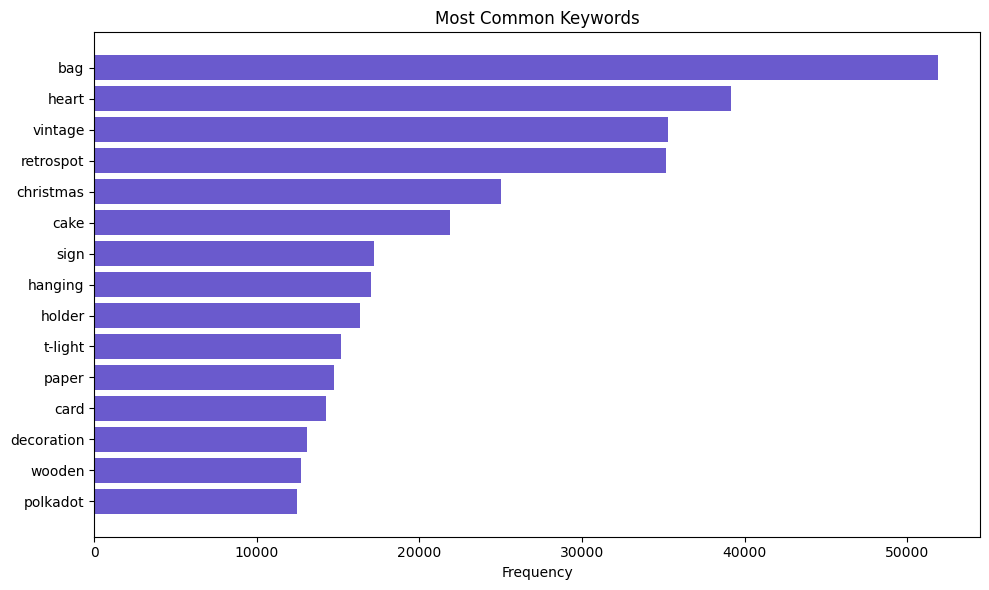

In [86]:
## Checking for most common keywords
top_words = word_counts.most_common(15)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.barh(words[::-1], counts[::-1], color='slateblue')
plt.xlabel('Frequency')
plt.title('Most Common Keywords')
plt.tight_layout()
plt.show()

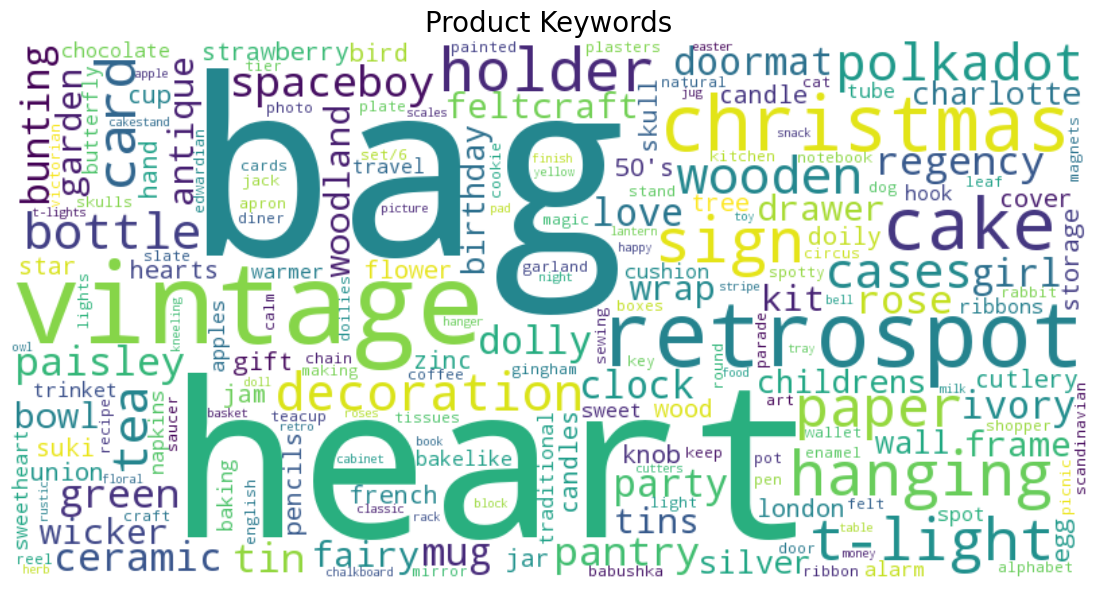

In [98]:
## Turning most common keywords into a word cloud

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      colormap='viridis').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Product Keywords", fontsize=20)
plt.show()

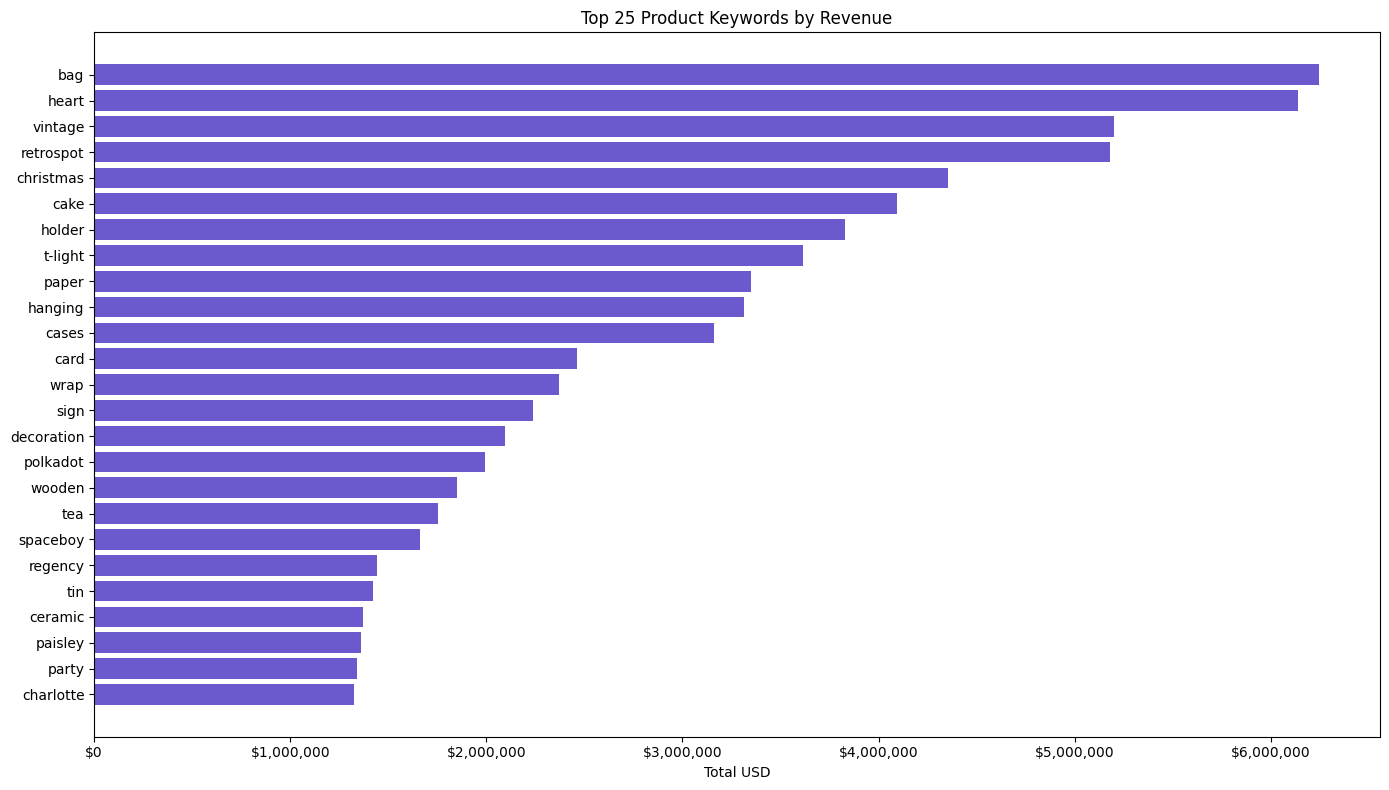

In [99]:
from collections import defaultdict
import matplotlib.ticker as ticker

word_usd = defaultdict(float)

for i, row in df.iterrows():
    words = row['ProductName'].split()
    for word in words:
        if word not in noise_words and len(word) > 2:
            word_usd[word] += row['Total_USD']

word_usd_df = pd.DataFrame(word_usd.items(), columns=['Word', 'Total_USD'])

top_words = word_usd_df.sort_values(by='Total_USD', ascending=False).head(25)

plt.figure(figsize=(14, 8))
plt.barh(top_words['Word'][::-1], top_words['Total_USD'][::-1], color='slateblue')

plt.xlabel('Total USD')
plt.title('Top 25 Product Keywords by Revenue')

formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

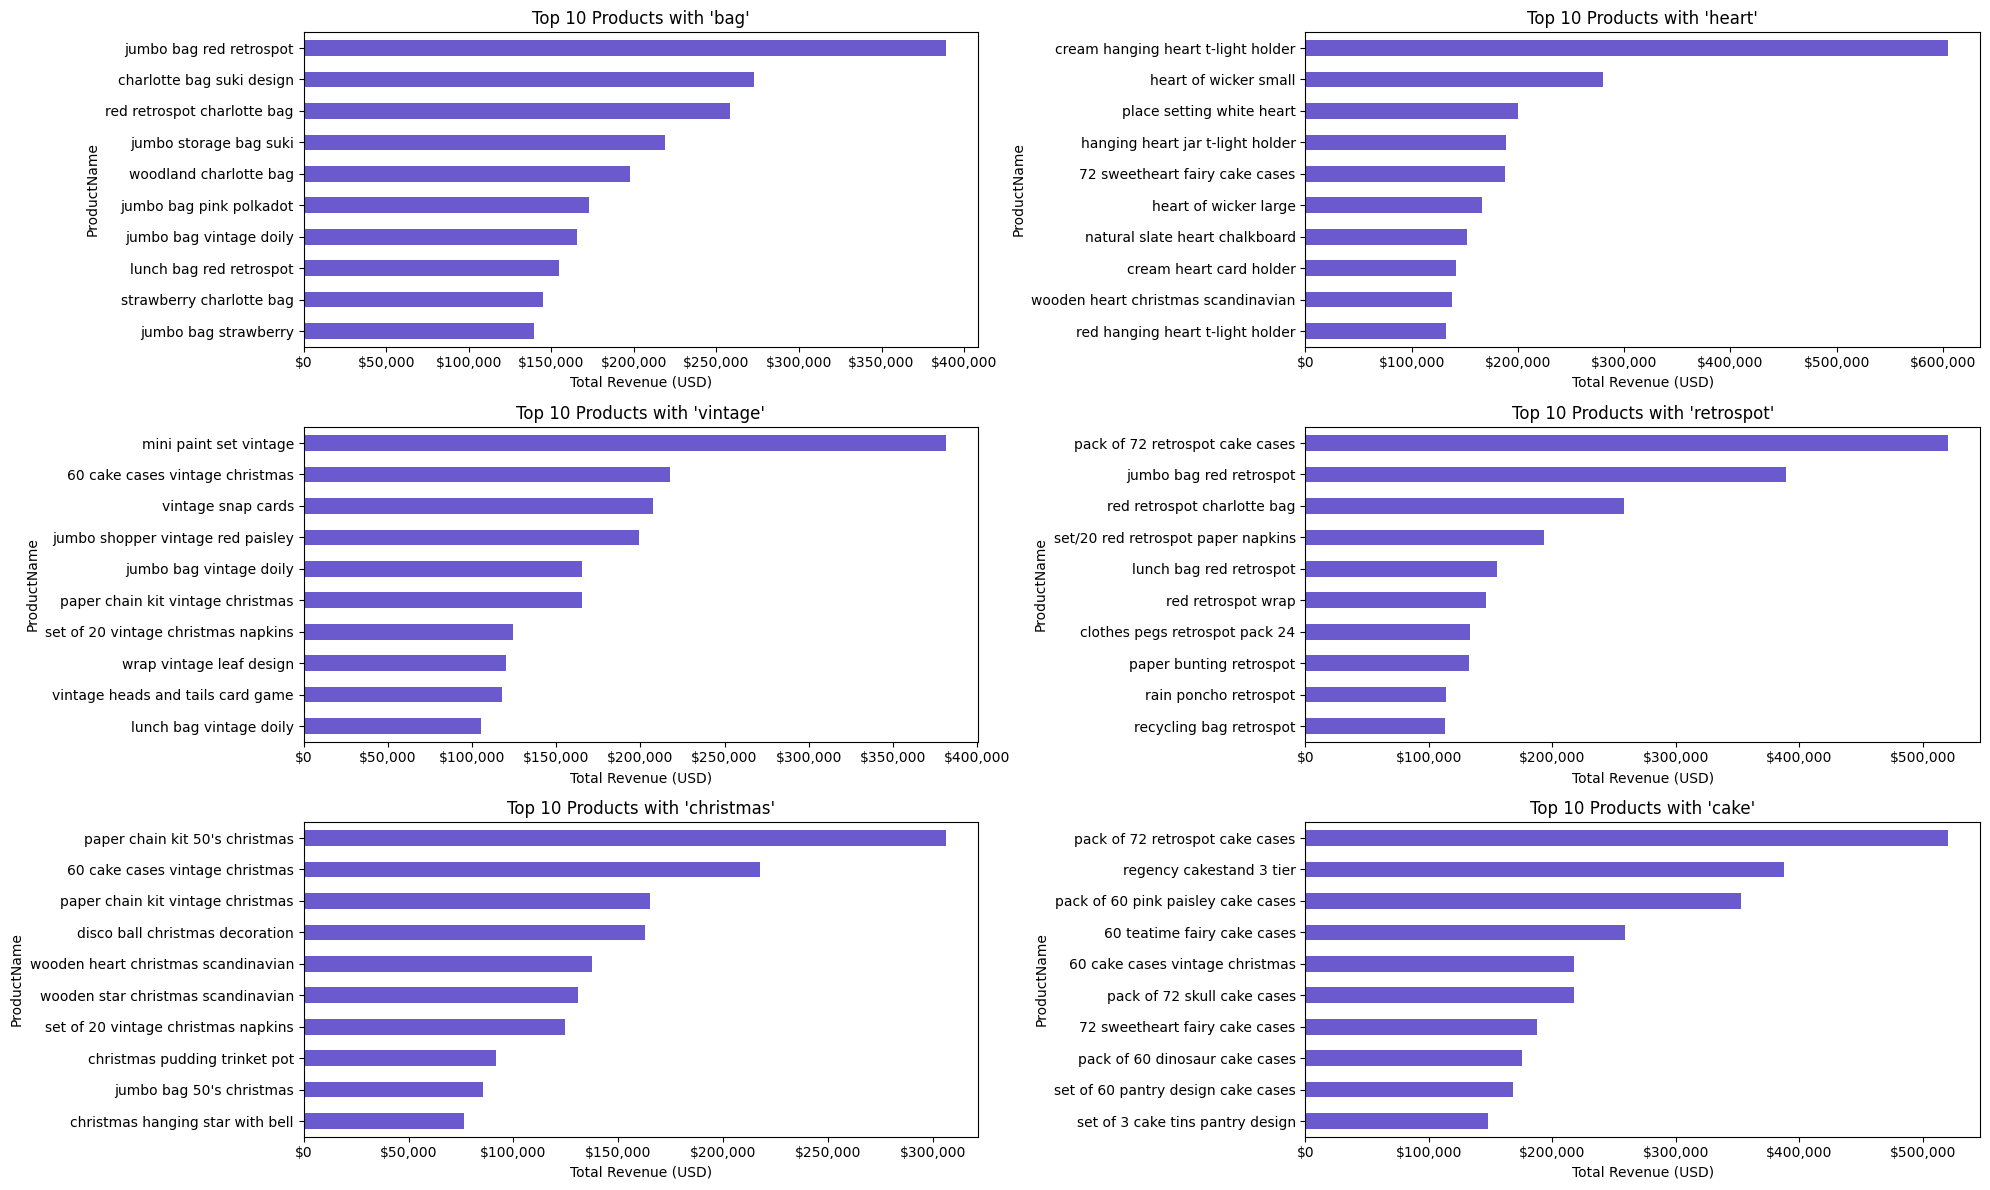

In [101]:
keywords = ["bag", "heart", "vintage", "retrospot", "christmas", "cake"]

fig, axes = plt.subplots(3, 2, figsize=(20, 12), sharex=False)

for ax, keyword in zip(axes.flatten(), keywords):
    filtered = df[df["ProductName"].str.contains(keyword, case=False, na=False)]
    totals = filtered.groupby("ProductName")["Total_USD"].sum()
    top6 = totals.sort_values(ascending=False).head(10)
    
    top6.plot(kind='barh', ax=ax, color='slateblue')
    ax.set_title(f"Top 10 Products with '{keyword}'")
    ax.set_xlabel("Total Revenue (USD)")
    ax.invert_yaxis()
    
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

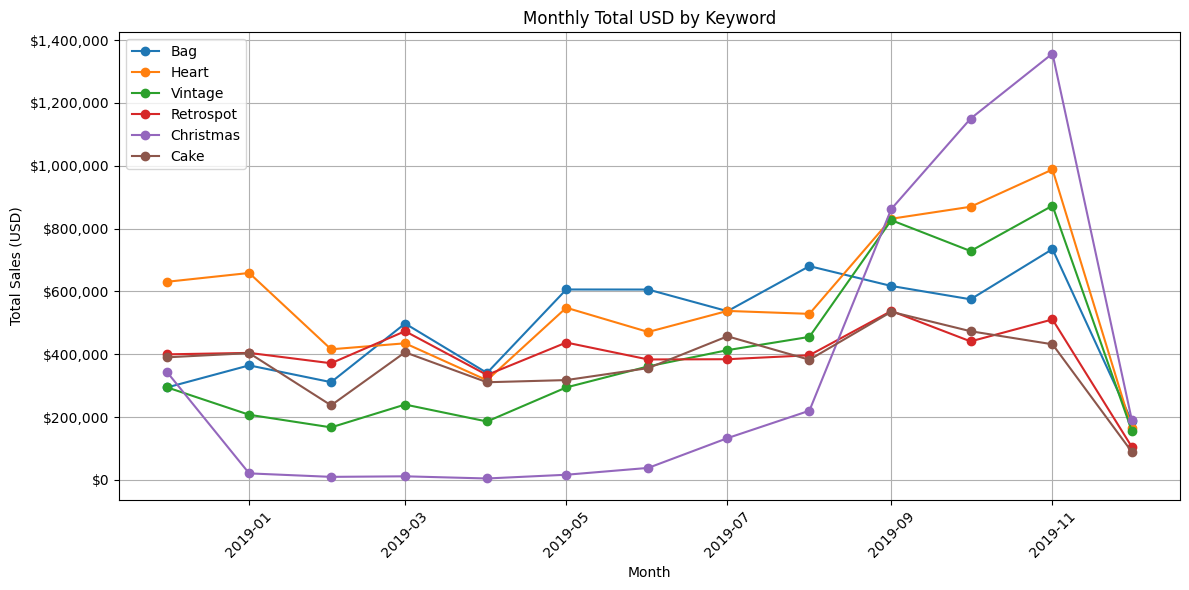

In [102]:
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
df['Date_dt'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

keywords = ['bag', 'heart', 'vintage', 'retrospot', 'christmas', 'cake']

plt.figure(figsize=(12, 6))

for keyword in keywords:
    df_kw = df[df['ProductName'].str.contains(keyword, case=False, na=False)]
    monthly_totals = df_kw.groupby(df_kw['Date_dt'].dt.to_period('M'))['Total_USD'].sum()
    monthly_totals.index = monthly_totals.index.to_timestamp()
    plt.plot(monthly_totals.index, monthly_totals.values, marker='o', label=keyword.capitalize())

plt.title('Monthly Total USD by Keyword')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.legend()
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.grid(True)
plt.tight_layout()
plt.show()

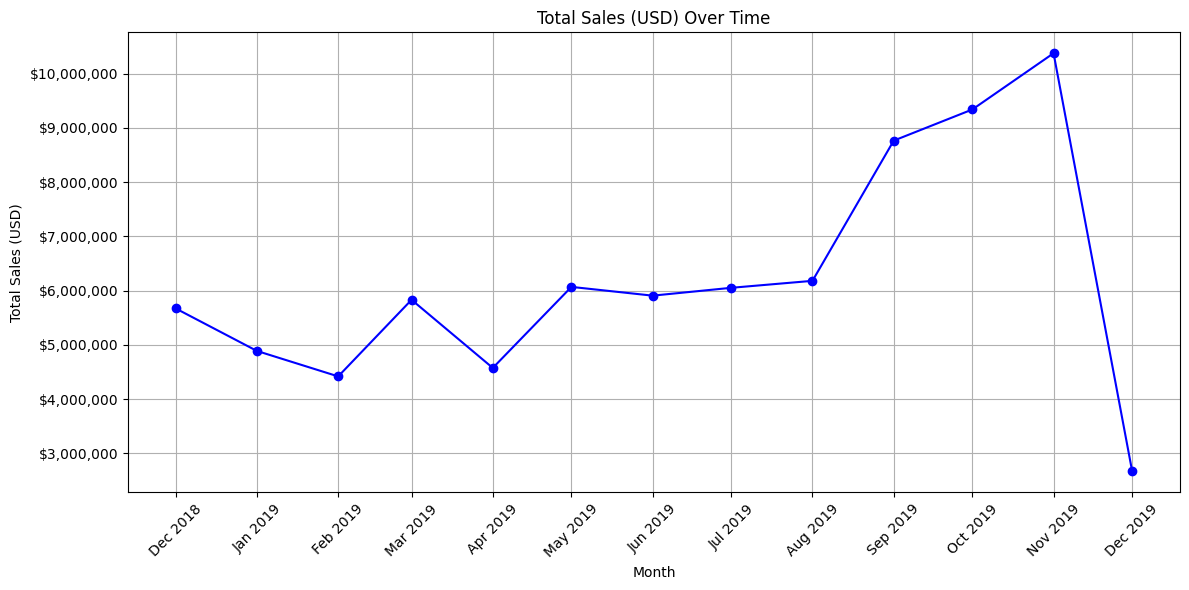

In [103]:
df['Date_dt'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

monthly_total_sales = df.groupby(df['Date_dt'].dt.to_period('M'))['Total_USD'].sum()
monthly_total_sales.index = monthly_total_sales.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_total_sales.index, monthly_total_sales.values, marker='o', color='blue')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

plt.title("Total Sales (USD) Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

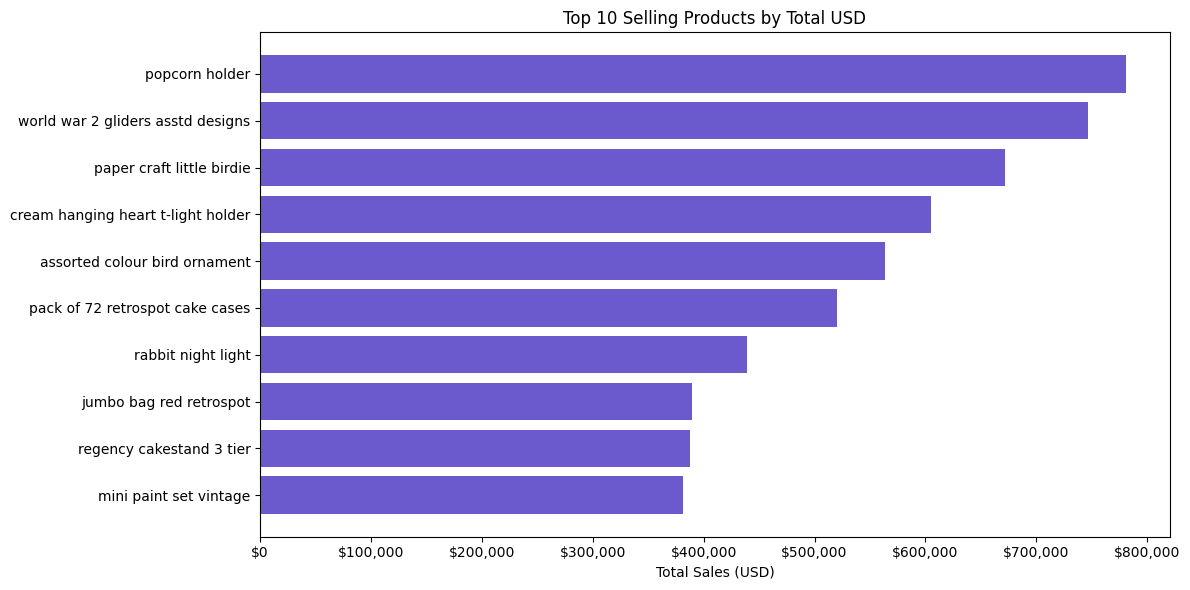

In [104]:
top_products = df.groupby('ProductName')['Total_USD'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.barh(top_products.index[::-1], top_products.values[::-1], color='slateblue')
plt.title('Top 10 Selling Products by Total USD')
plt.xlabel('Total Sales (USD)')

plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

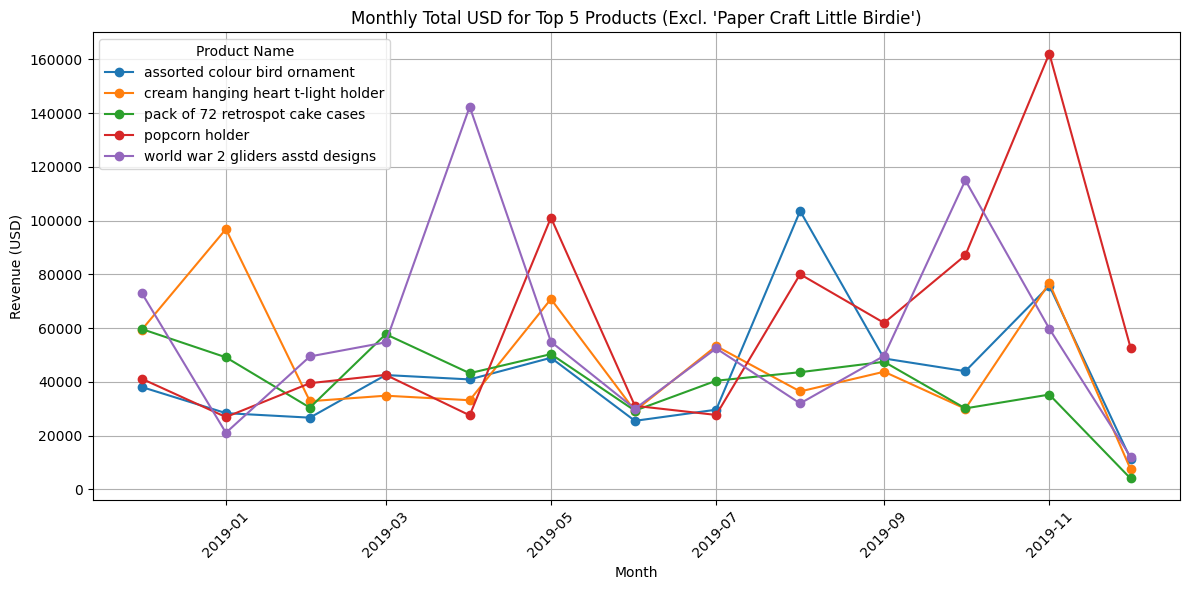

In [88]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

top_products = (
    df[df['ProductName'] != 'paper craft little birdie']
    .groupby('ProductName')['Total_USD']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index)

df_top = df[df['ProductName'].isin(top_products)].copy()

df_top['Month'] = df_top['Date'].dt.to_period('M').dt.to_timestamp()

monthly_sales = df_top.groupby(['Month', 'ProductName'])['Total_USD'].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
for product in monthly_sales.columns:
    plt.plot(monthly_sales.index, monthly_sales[product], marker='o', label=product)

plt.title("Monthly Total USD for Top 5 Products (Excl. 'Paper Craft Little Birdie')")
plt.xlabel("Month")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Product Name')
plt.tight_layout()
plt.show()


In [73]:
total_revenue = df['Total_USD'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $80,741,146.31
